# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import calendar

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
libdir = os.chdir(r'C:\Users\Nidhi\Desktop\Saransh\FinalCapstone\Complaints')

In [3]:
file = r'./data/raw/complaints-2021-06-04_23_36.csv'
df = pd.read_csv(file)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/13/19,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,None,JPMORGAN CHASE & CO.,CA,90301,None,Consent not provided,Web,04/13/19,Closed with explanation,Yes,NaN,3211475
1,05/01/19,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,Good morning my name is XXXX XXXX and I apprec...,None,JPMORGAN CHASE & CO.,GA,319XX,Servicemember,Consent provided,Web,05/01/19,Closed with explanation,Yes,NaN,3229299
2,04/02/19,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,None,JPMORGAN CHASE & CO.,TX,77069,None,Consent provided,Web,04/02/19,Closed with explanation,Yes,NaN,3199379
3,09/13/17,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,None,JPMORGAN CHASE & CO.,MI,48066,None,Consent not provided,Web,09/14/17,Closed with explanation,Yes,NaN,2673060
4,04/05/19,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Charged too much interest,NaN,None,JPMORGAN CHASE & CO.,NY,10473,None,NaN,Referral,04/05/19,Closed with explanation,Yes,NaN,3203545


In [4]:
df.shape

(78898, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78898 entries, 0 to 78897
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 78898 non-null  object
 1   Product                       78898 non-null  object
 2   Sub-product                   78898 non-null  object
 3   Issue                         78898 non-null  object
 4   Sub-issue                     78898 non-null  object
 5   Consumer complaint narrative  21370 non-null  object
 6   Company public response       78898 non-null  object
 7   Company                       78898 non-null  object
 8   State                         78898 non-null  object
 9   ZIP code                      78898 non-null  object
 10  Tags                          78898 non-null  object
 11  Consumer consent provided?    35900 non-null  object
 12  Submitted via                 78898 non-null  object
 13  Date sent to com

In [6]:
df['Product'] = df['Product'].astype('category')
df['Sub-product'] = df['Sub-product'].astype('category')
df['State'] = df['State'].astype('category')
df['ZIP code'] = df['ZIP code'].astype('category')
df['Consumer consent provided?'] = df['Consumer consent provided?'].astype('category')
df['Timely response?'] = df['Timely response?'].astype('category')
df['Consumer disputed?'] = df['Consumer disputed?'].astype('category')
df['Submitted via'] = df['Submitted via'].astype('category')
df['Issue'] = df['Issue'].astype('category')
df['Sub-issue'] = df['Sub-issue'].astype('category')

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].astype('string')
df['Company public response'] = df['Company public response'].astype('string')
df['Company'] = df['Company'].astype('string')
df['Tags'] = df['Tags'].astype('string')
df['Company response to consumer'] = df['Company response to consumer'].astype('string')



In [7]:
#df['Date received'] = dt.to_date(df['Date received'])
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78898 entries, 0 to 78897
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 78898 non-null  datetime64[ns]
 1   Product                       78898 non-null  category      
 2   Sub-product                   78898 non-null  category      
 3   Issue                         78898 non-null  category      
 4   Sub-issue                     78898 non-null  category      
 5   Consumer complaint narrative  21370 non-null  string        
 6   Company public response       78898 non-null  string        
 7   Company                       78898 non-null  string        
 8   State                         78898 non-null  category      
 9   ZIP code                      78898 non-null  category      
 10  Tags                          78898 non-null  string        
 11  Consumer consent provided?  

In [9]:
df[df.duplicated()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [10]:
df.nunique()

Date received                    3463
Product                            17
Sub-product                        73
Issue                             154
Sub-issue                         206
Consumer complaint narrative    21220
Company public response             4
Company                             1
State                              63
ZIP code                         9454
Tags                                4
Consumer consent provided?          5
Submitted via                       6
Date sent to company             3329
Company response to consumer        8
Timely response?                    2
Consumer disputed?                  2
Complaint ID                    78898
dtype: int64

In [11]:
df.drop(['ZIP code','Complaint ID','Date received','Date sent to company','Company','Company public response'], inplace = True, axis =1)

In [12]:
df = df[~df['Consumer complaint narrative'].isna()]

In [13]:
df['Product'].replace(['Credit reporting, credit repair services, or other personal consumer reports','Credit card','Credit reporting','Prepaid card'],'Credit card or prepaid card', inplace = True)
df['Product'].replace(['Bank account or service','Money transfer, virtual currency, or money service','Money transfers','Debt collection'],'Checking or savings account',inplace = True)
df['Product'].replace(['Vehicle loan or lease','Consumer Loan','Student loan','Payday loan, title loan, or personal loan','Other financial service','Payday loan'],'Loans',inplace = True)

In [14]:
df.nunique()

Product                             4
Sub-product                        69
Issue                             133
Sub-issue                         191
Consumer complaint narrative    21220
State                              61
Tags                                4
Consumer consent provided?          1
Submitted via                       1
Company response to consumer        4
Timely response?                    2
Consumer disputed?                  2
dtype: int64

In [15]:
cols = df.select_dtypes(include ='category').columns
for col in cols:
    print(col)
    print(df[col].value_counts())
    print('*'*20)

Product
Credit card or prepaid card    9370
Checking or savings account    7892
Mortgage                       3263
Loans                           845
Name: Product, dtype: int64
********************
Sub-product
Checking account                              5115
General-purpose credit card or charge card    5000
None                                          2109
Credit reporting                              2056
Conventional home mortgage                     967
                                              ... 
Federal student loan                             1
ID prepaid card                                  0
Second mortgage                                  0
Medical                                          0
Federal student loan debt                        0
Name: Sub-product, Length: 73, dtype: int64
********************
Issue
Managing an account                                                                2326
Problem with a purchase shown on your statement                    

In [16]:
df['Consumer disputed?'].fillna('No', inplace = True)
df['Consumer disputed?'].value_counts()

No     19718
Yes     1652
Name: Consumer disputed?, dtype: int64

In [17]:
df['Consumer consent provided?'].fillna('None',inplace = True)
df['Consumer consent provided?'].value_counts()

Consent provided        21370
Other                       0
None                        0
Consent withdrawn           0
Consent not provided        0
Name: Consumer consent provided?, dtype: int64

# Exploratory Data Analysis

In [18]:
df['Consumer disputed?'].value_counts()

No     19718
Yes     1652
Name: Consumer disputed?, dtype: int64

<AxesSubplot:xlabel='Consumer disputed?', ylabel='count'>

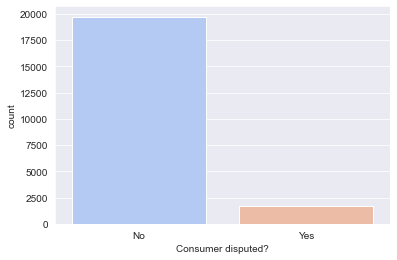

In [19]:
sns.countplot(data = df, x = 'Consumer disputed?',palette = 'coolwarm')

The data is imbalanced with most of the customer being satisfied with the resolution and only 12% of customers disputing the resolution provided


### Product

In [20]:
grp = (df.groupby('Product').Product.count()/len(df))*100
grp.sort_values(ascending=False,inplace = True)
grp

Product
Credit card or prepaid card    43.846514
Checking or savings account    36.930276
Mortgage                       15.269069
Loans                           3.954141
Name: Product, dtype: float64

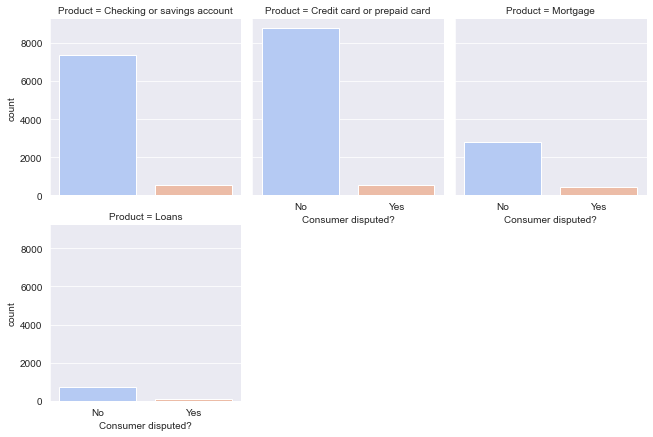

In [22]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'Product'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

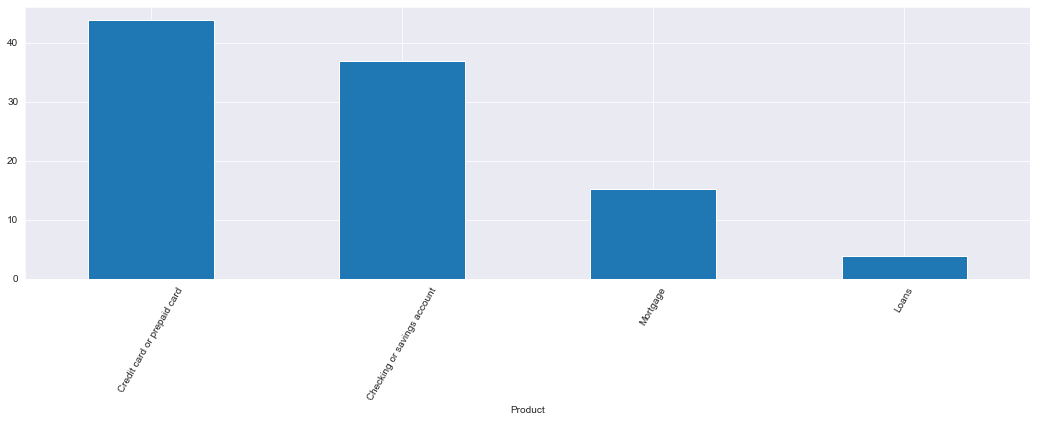

In [23]:
grp = ((df.groupby('Product').Product.count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

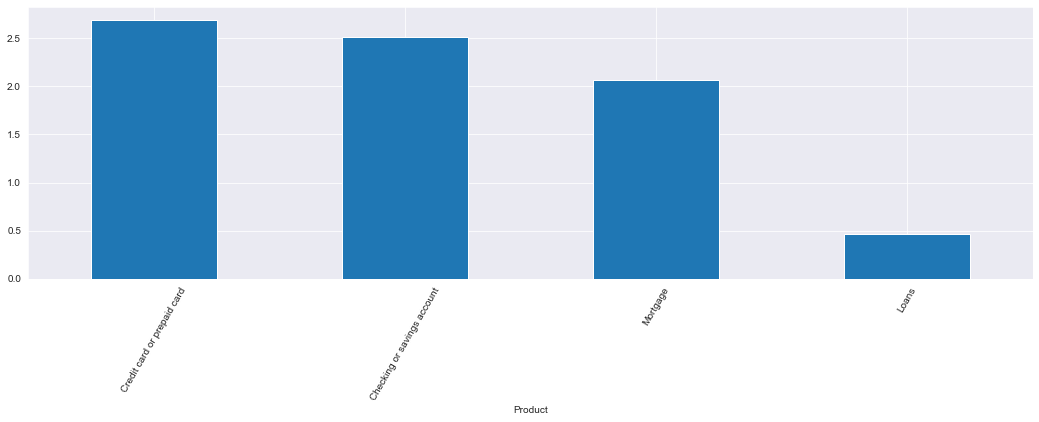

In [24]:
grp = ((df[df['Consumer disputed?']=='Yes'].groupby('Product').Product.count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [25]:
grp = (df.groupby('Consumer consent provided?')['Consumer consent provided?'].count()/len(df))*100
grp.sort_values(ascending=False,inplace = True)
grp

Consumer consent provided?
Consent provided        100.0
Other                     0.0
None                      0.0
Consent withdrawn         0.0
Consent not provided      0.0
Name: Consumer consent provided?, dtype: float64

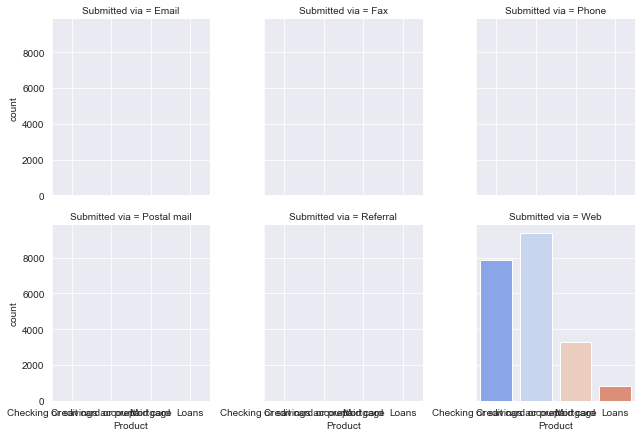

In [28]:
sns.catplot(data = df, x = 'Product',col = 'Submitted via'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

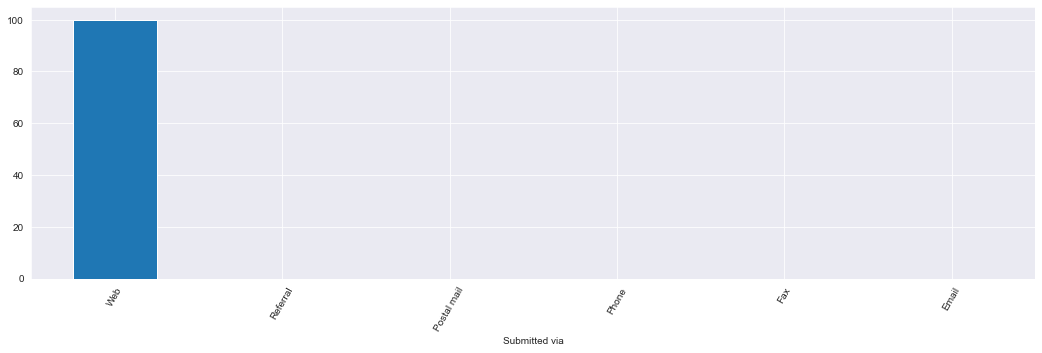

In [29]:
grp = ((df.groupby('Submitted via')['Submitted via'].count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

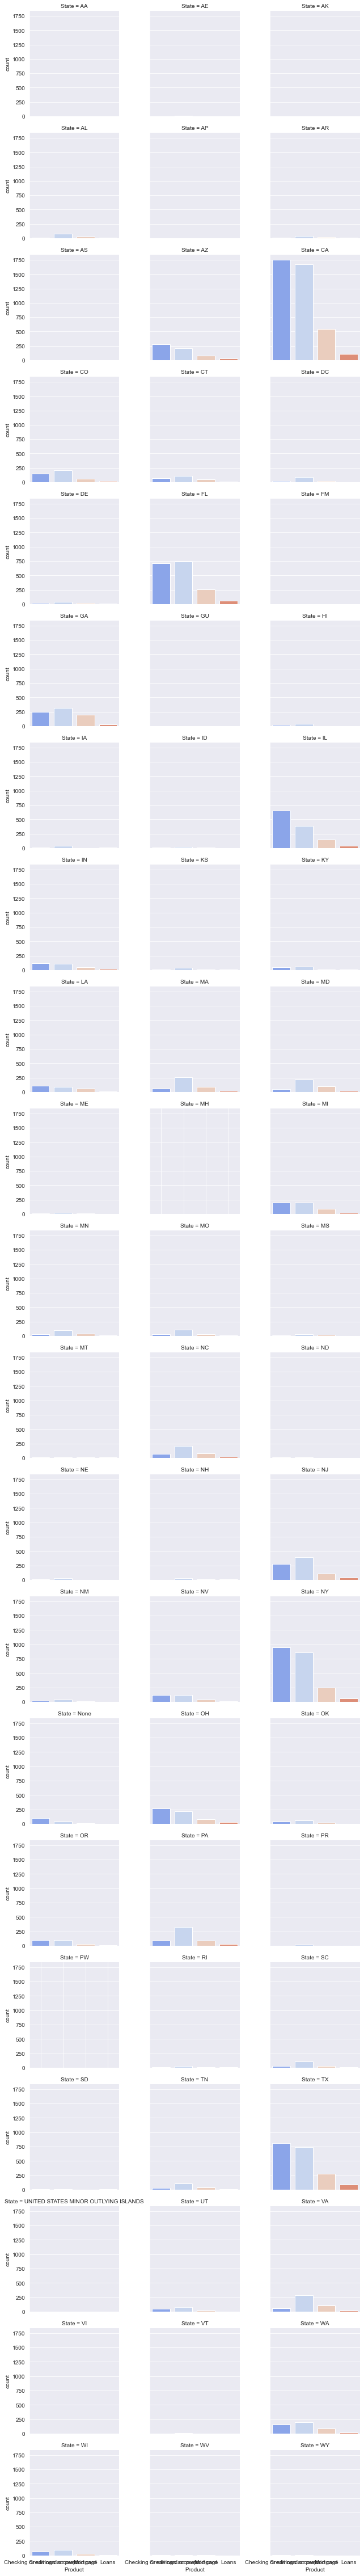

In [30]:
sns.catplot(data = df, x = 'Product',col = 'State'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

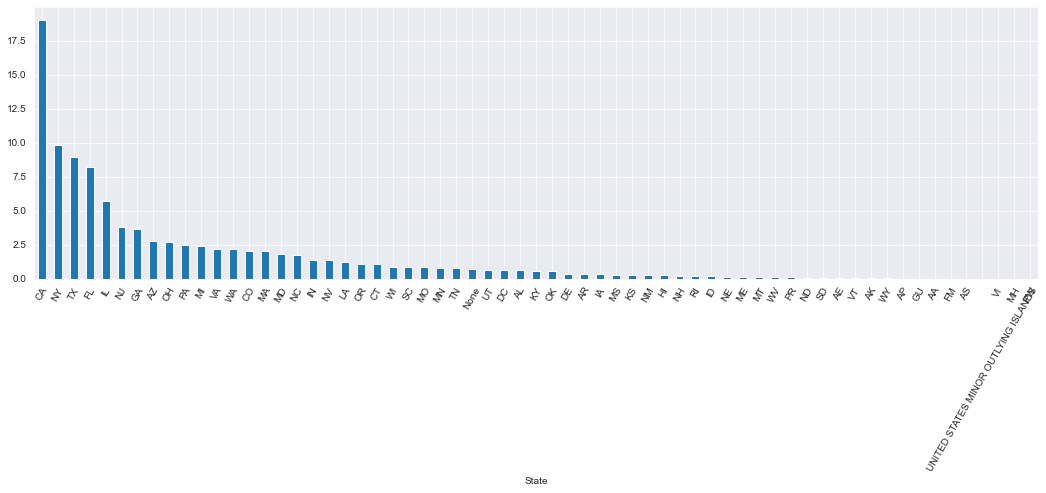

In [31]:
grp = ((df.groupby('State').State.count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

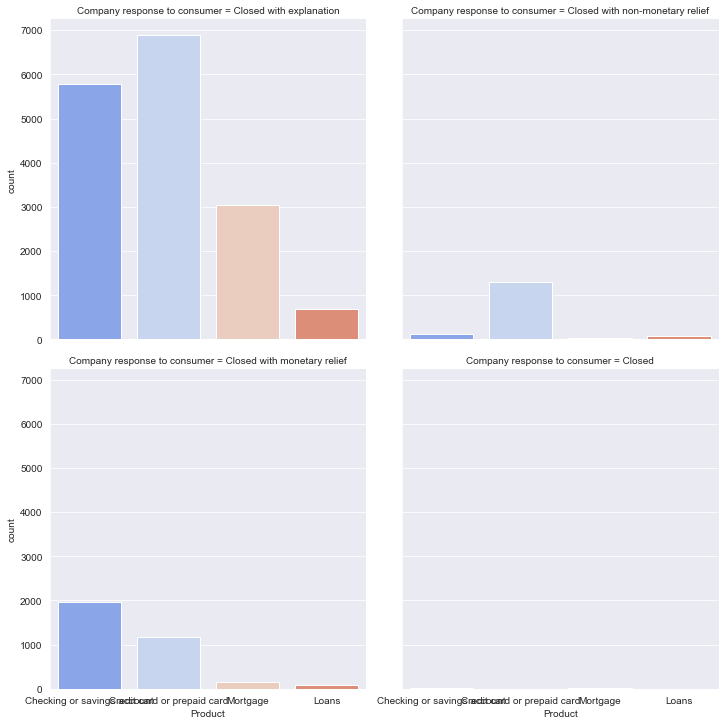

In [32]:
sns.catplot(data = df, x = 'Product',col = 'Company response to consumer'
               ,col_wrap = 2,kind = 'count',palette = 'coolwarm')

In [36]:
df.to_csv('./data/interim/complaints.csv',index = False)